In [5]:
import numpy as np
from mlcevaluator1 import mlcEvaluator1
from mlcevaluator2 import mlcEvaluator2
from mlctensor import mlcTensor
from sklearn.metrics import multilabel_confusion_matrix


## Syntetic example
Generate true and predicted labels

In [6]:
# Example GT and Prediction matrices
gt=np.asarray([[1,1,0], [1,1,1], [0,0,0],
               [1,0,0], [1,1,0], [0,0,0],
               [1,0,0], [1,1,0], [1,1,0]])
              
pred=np.asarray([[1,1,0],[1,0,1],[0,0,0],
                 [1,1,1], [1,1,1], [0,1,1],
                 [0,1,1], [1,0,1], [0,0,1]])

## Multi-label Confusion Tensor
Compute raw Multi-Label Confusion Tensor and normalized Recall and Precision Confusion matrices

In [7]:
evalT = mlcTensor(gt, pred)
MT = evalT.computeConfusionTensor(unique=True)
RT = evalT.getRecall()
PT = evalT.getPrecision()

In [8]:
PT.shape

(4, 4)

In [9]:
from utils import show_heatmap
labels=['C0', 'C1','C2', 'unkn.']

### Show Recall heatmap

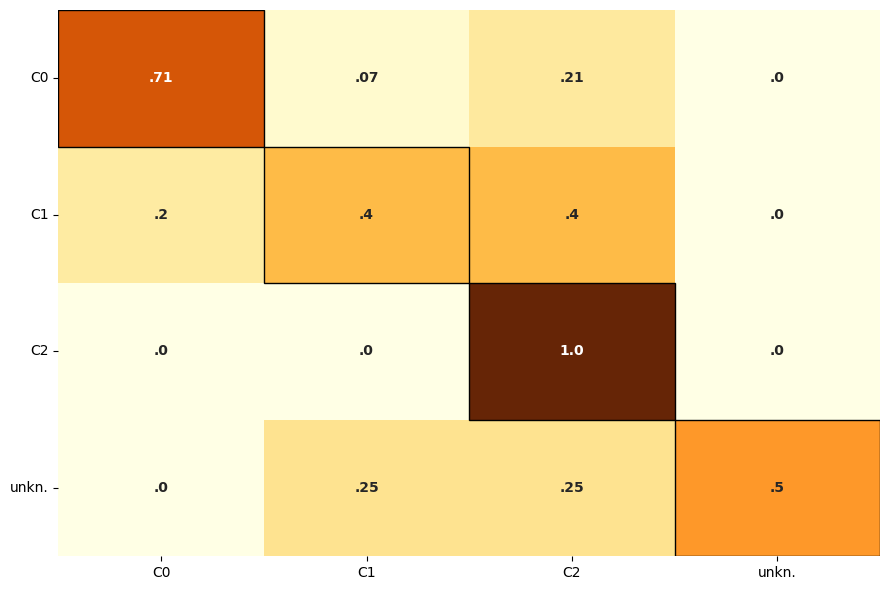

In [10]:
show_heatmap(RT, labels=labels)

### Show Precision heatmap

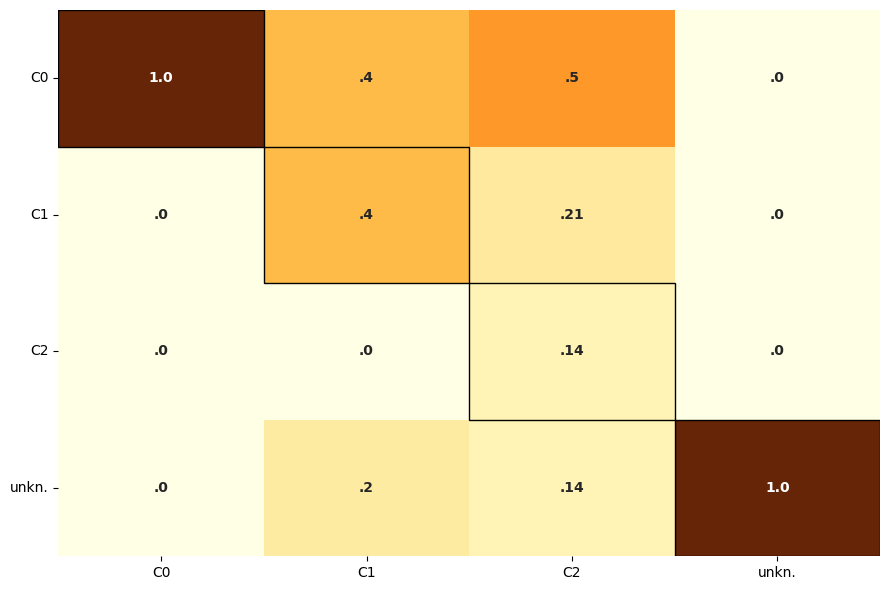

In [11]:
show_heatmap(PT, labels=labels)

## Multi-Label Confusion Matrix, Krstinic et al.
Compute raw Multi-Label Confusion Matrix and normalized Recall and Precision Confusion matrices

In [12]:
evalD = mlcEvaluator1(gt, pred, use_unknown=True)
MD = evalD.computeConfusionMatrix()
RD = evalD.getRowNormalized()
PD = evalD.getColumnNormalized()

### Show Recall heatmap

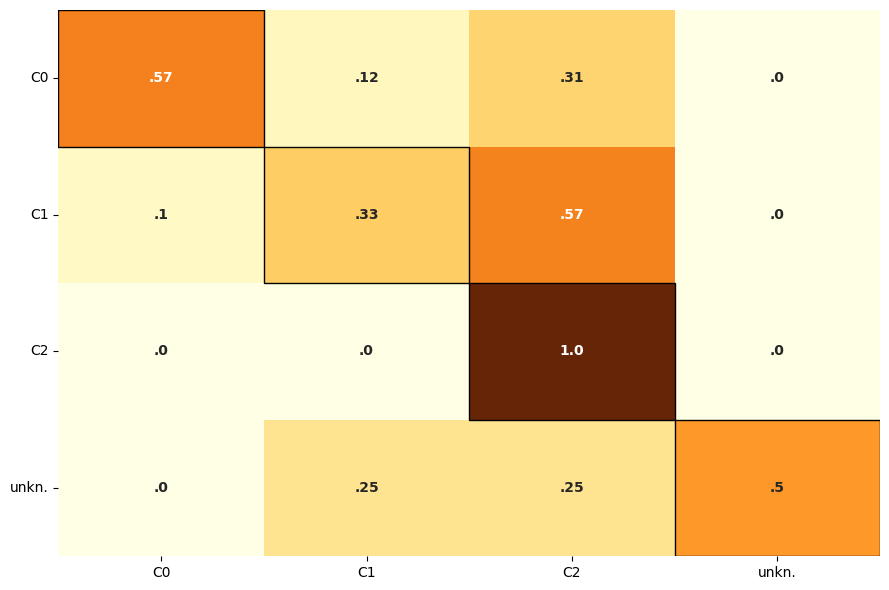

In [13]:
show_heatmap(RD, labels=labels)

### Show Precision heatmap

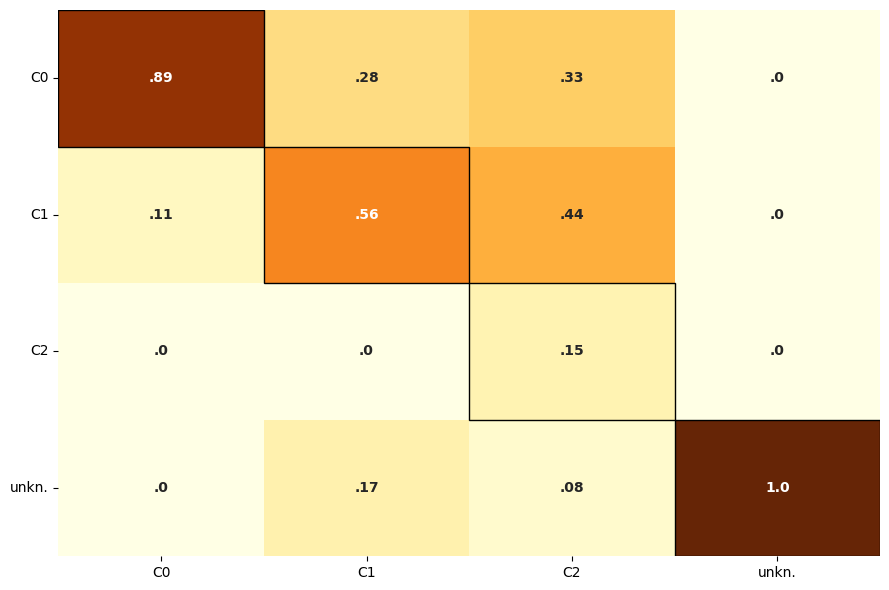

In [14]:
show_heatmap(PD, labels=labels)

## Multi-Label Confusion Matrix, Heydarian et al.

Compute raw Multi-Label Confusion Matrix and normalized Recall and Precision Confusion matrices


In [15]:
evalH = mlcEvaluator2(gt, pred)
MH = evalH.computeConfusionMatrix()
RH = evalH.getRowNormalized()
PH = evalH.getColumnNormalized()

### Show Recall heatmap

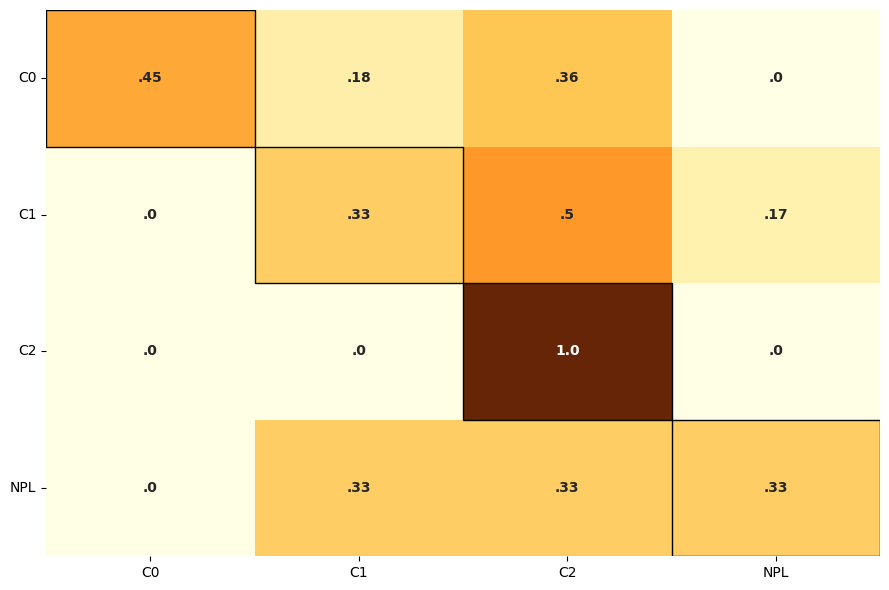

In [16]:
# Set last label to 'NPL' instead of 'unknown'
labels=['C0', 'C1','C2', 'NPL']
show_heatmap(RH, labels=labels)

### Show Precision heatmap

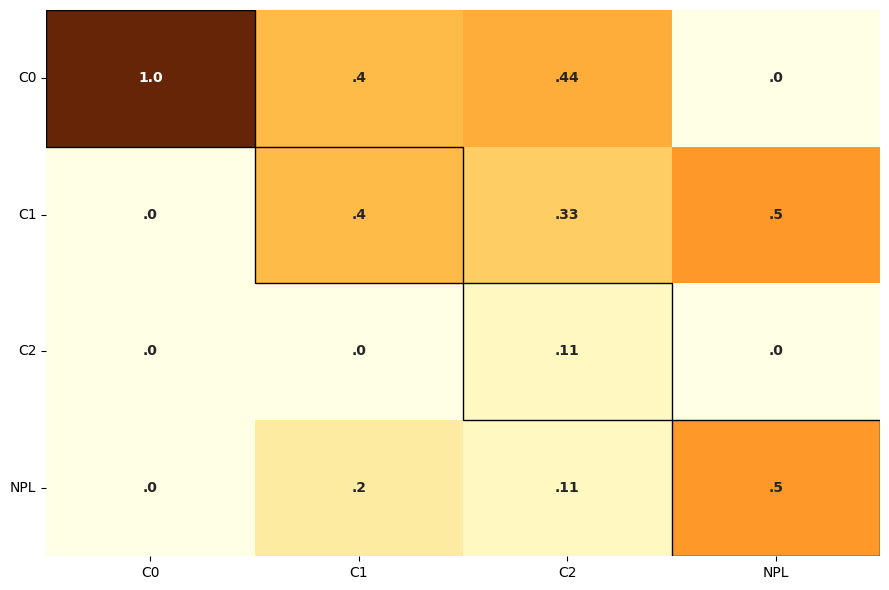

In [17]:
show_heatmap(PH, labels=labels)

## Conventional Precision/Recall
Compute Recall and Precision as:
$$
R(k) = \frac{TP(k)}{TP(k)+FN(k)},\qquad P(k) = \frac{TP(k)}{TP(k)+FP(k)}
$$
where $k$ is the class index, $TP(k)$ stands for a number of correctly assigned labels, $FN(k)$ represents the number of cases where the relevant label $k$ was not assigned to an instance and $FP(k)$ is a number of instances with incorrectly assigned label $k$.

In [33]:
from utils import convPrecisionRecall, addUnknown
gt1 = addUnknown(gt)
pred1 = addUnknown(pred)
pC, rC = convPrecisionRecall(gt1,pred1)
np.round(rC, decimals=2)
np.round(pC, decimals=2)

array([1.  , 0.4 , 0.14, 1.  ])

## Recall and Precision from confusion
Get Recall and Precision values for all three approaches

In [37]:
rT=RT.diagonal().round(decimals=2)
pT=PT.diagonal().round(decimals=2)
rD=RD.diagonal().round(decimals=2)
pD=PD.diagonal().round(decimals=2)
rH=RH.diagonal().round(decimals=2)
pH=PH.diagonal().round(decimals=2)

Compare computed values

In [38]:
print('Recall\t\t\t\tPrecision')
print('C\tT\tK\tH\tC\tT\tK\tH')

for k in range(gt1.shape[1]):
    print('%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f' %(rC[k], rT[k], rD[k], rH[k], pC[k], pT[k], pD[k], pH[k]))   


Recall				Precision
C	T	K	H	C	T	K	H
0.71	0.71	0.57	0.45	1.00	1.00	0.89	1.00
0.40	0.40	0.33	0.33	0.40	0.40	0.56	0.40
1.00	1.00	1.00	1.00	0.14	0.14	0.15	0.11
0.50	0.50	0.50	0.33	1.00	1.00	1.00	0.50
